In [131]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
from matplotlib import lines

import pandas as pd
import numpy as np
import os
from os.path import join as opj
import seaborn as sns
colors = sns.color_palette()

home = os.path.expanduser('~')
resultsdir = opj(home, 'Dropbox', 'ResMas_UvA', 'Thesis', 'Git', 'Analysis_results')
filepath = opj(resultsdir, 'benchmark_results.csv')

data = pd.read_csv(filepath, sep='\t', skiprows=21)
data = data.dropna(how='any')
data['fs_count'] = data['fs_count'].astype(float)
data['sub_name'] = np.arange(len(data.index))

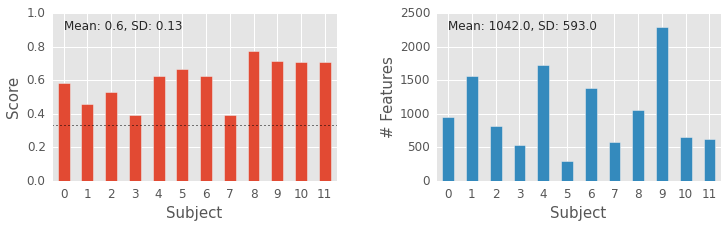

In [163]:
mean_score = np.round(data['score'].mean(), 2)
std_score = np.round(data['score'].std(), 2)
mean_feat = np.round(data['fs_count'].mean(), 0)
std_feat = np.round(data['fs_count'].std(), 0)

fig, axes = plt.subplots(1,2)

data.plot(kind='bar', x='sub_name', y='score', legend=False, rot=0, fontsize=12, 
          ylim=(0,1), ax=axes[0], figsize=(12, 3))

axes[0].axhline(y=0.333, c="black", linewidth=1, ls=':')
axes[0].set_ylabel('Score', fontsize=15)
axes[0].set_xlabel('Subject', fontsize=15)
axes[0].text(0, 0.9, 'Mean: %s, SD: %s' % (mean_score, std_score), size=12)
        
data.plot(kind='bar', x='sub_name', y='fs_count', legend=False, 
              rot=0, fontsize=12, ax=axes[1], color=colors[1])

axes[1].set_xlabel('Subject', fontsize=15)
axes[1].set_ylabel('# Features', fontsize=15)
axes[1].text(0, 2250, 'Mean: %s, SD: %s' % (mean_feat, std_feat), size=12)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on') # labels along the bottom edge are off

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left='on',      # ticks along the bottom edge are off
    right='off')

plt.subplots_adjust(wspace=0.35)
plt.savefig(opj(resultsdir, 'benchmark_plot.png'), dpi=600, bbox_inches='tight')